In [1]:
#Basic Libaries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [5]:
dataset=pd.read_csv("C:\\Users\\SavadamuthuSaravanan\\data.csv")

In [6]:
df=dataset.copy()

In [7]:
df.shape

(569, 33)

In [8]:
df=df.drop(["Unnamed: 32",'id'],axis=1)
df.shape

(569, 31)

In [9]:
df.isnull().sum()/len(df)*100

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
df['diagnosis'].value_counts()/len(df['diagnosis'])*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

<AxesSubplot:ylabel='Frequency'>

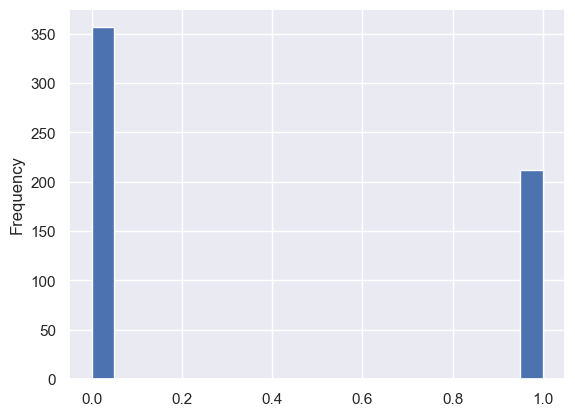

In [12]:
df['diagnosis'].plot(kind='hist',bins=20)

In [12]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
#cancer type is Malignant or Benign
#Malignant is our target so we updated into and Benign is 0

# Lets start the model building

In [13]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [ ]:
# StandardScaler
# Standardizes features by removing the mean and scaling to unit variance.This ensures that each feature contributes equally to the model, preventing features with larger magnitudes from dominating the learning process.
# The standard score of a sample x is calculated as: z = (x - u) / s
# where u is the mean of the training data, and s is the standard deviation of the training data.

In [ ]:
#MinMaxScaler
# 1.Transforms features by scaling each feature to a given range (default is [0, 1]).
# 2.The transformation is given by: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
# where min and max are the feature range.

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
scaled_x=scaler.fit(x)
scaled_x

StandardScaler()

In [15]:
scaled_x=scaler.fit_transform(x)
scaled_x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
x_df=pd.DataFrame(scaled_x,columns=x.columns)
x_df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,-0.255070,-0.592662,-0.321304,-0.289258,0.156347,0.445544,0.160025,-0.069124,0.134119,0.486846,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0.149883,-0.804940,0.155410,0.298627,-0.909030,-0.651568,-0.310141,-0.228089,-0.829666,-0.611218,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0.643623,0.290561,0.490051,0.233722,0.588031,0.268933,-0.232554,0.435349,-0.688004,0.611669,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.227743,-0.352403,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,-0.388250,0.693345,-0.409420,-0.360764,0.036008,2.609587,1.509848,0.409395,-0.321136,2.377346,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [20]:
x_df.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [21]:
#Calculate eigen value, eign vector PCA in manually
from sklearn.decomposition import PCA

### step 1: Calculate Coveriance Matrix

In [22]:
cov_matrix=x_df.cov()

In [23]:
cov_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,0.680286,-0.097489,0.675359,0.737159,-0.222992,0.206363,0.194546,0.376831,-0.104505,-0.042716,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
texture_mean,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,0.276354,0.387038,0.282169,0.260302,0.006625,0.192313,0.143545,0.164139,0.009143,0.054553,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
perimeter_mean,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,0.692983,-0.086914,0.694355,0.746294,-0.203051,0.251185,0.228484,0.407934,-0.081773,-0.005533,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
area_mean,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,0.733852,-0.066397,0.727908,0.801495,-0.167070,0.212957,0.208026,0.372976,-0.072624,-0.019922,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
smoothness_mean,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,0.301998,0.068527,0.296613,0.246987,0.332961,0.319505,0.248833,0.381346,0.201128,0.284106,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
compactness_mean,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,0.498349,0.046286,0.549872,0.456455,0.135537,0.740022,0.571521,0.643393,0.230381,0.508211,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
concavity_mean,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,0.633037,0.076353,0.661553,0.618514,0.098737,0.671459,0.692487,0.684463,0.178323,0.450092,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
concave points_mean,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,0.699279,0.021517,0.711901,0.691514,0.027702,0.491288,0.439940,0.616718,0.095519,0.258037,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
symmetry_mean,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,0.303913,0.128278,0.314445,0.224365,0.187651,0.422402,0.343230,0.393990,0.449927,0.332370,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
fractal_dimension_mean,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,0.000111,0.164463,0.039900,-0.090329,0.402672,0.560822,0.447417,0.341799,0.345615,0.689343,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


In [24]:
cov_matrix.shape

(30, 30)

In [25]:
eigen_value,eigen_vector=np.linalg.eig(cov_matrix)

In [26]:
eigen_value

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [27]:
np.sum(eigen_value)

30.05281690140845

In [29]:
eigen_vector

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [30]:
len(eigen_vector)

30

## eigen vectors are represented by columns, not reprented by rows

In [31]:
#Let sort the eigen values
sorted_values=np.argsort(eigen_value)
sorted_values

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 28, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)

In [32]:
#PCA is dot product of the original data and eigen vector
principalcomponents=np.dot(scaled_x,eigen_vector)
principalcomponents

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.06884992,
         0.3455649 , -0.09651489],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.09457845,
        -0.11413308,  0.07732747],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.06030903,
        -0.20453223, -0.31106671],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ..., -0.06335249,
        -0.08141992,  0.03659227],
       [10.37479406,  1.67201011, -1.87702933, ...,  0.04247831,
         0.17321637, -0.1406475 ],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  0.24323754,
         0.16325407, -0.27467971]])

In [33]:
#Let find the accuracy of 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=43,stratify=y)

In [34]:
#x_train.head()

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf=RandomForestClassifier()

In [37]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y_predict=rf.predict(x_test)

In [39]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
accuracy_score(y_test,y_predict)

0.956140350877193

In [42]:
confusion_matrix(y_test,y_predict)

array([[69,  3],
       [ 2, 40]], dtype=int64)

In [43]:
x_df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [44]:
#apply PCA
pca1=PCA()
x_pca=pca1.fit(x_df)
x_pca

PCA()

In [45]:
#Check the information details in column wise 
x_pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [46]:
np.sum(x_pca.explained_variance_ratio_)

1.0

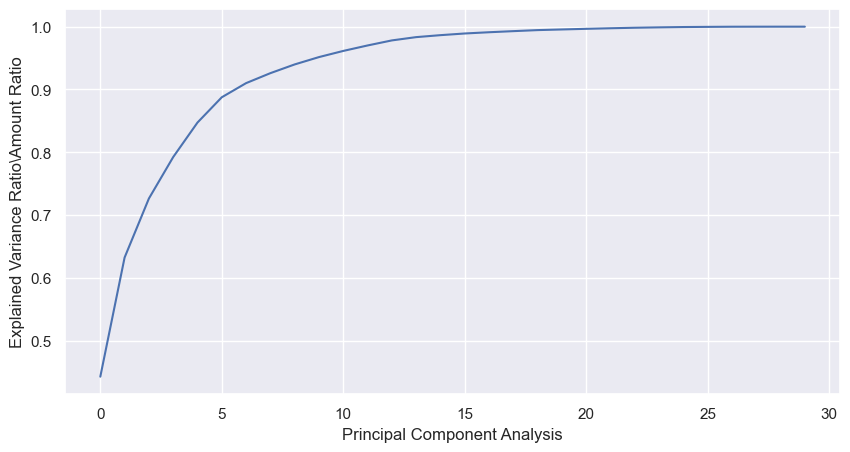

In [47]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(x_pca.explained_variance_ratio_))
plt.xlabel("Principal Component Analysis")
plt.ylabel("Explained Variance Ratio\Amount Ratio")
plt.show()

In [48]:
pca_2=PCA(n_components=15)
x_pca_2=pca_2.fit_transform(x_df)
x_pca_2

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         1.03387303e-01, -6.90803533e-01, -6.01769599e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -9.43529371e-01, -6.53474856e-01,  8.98655229e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.10626574e-01,  1.66797557e-02,  4.83418621e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         1.57417965e-01,  2.85690810e-01,  9.09961516e-02],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         1.22519468e+00,  2.18698353e-01,  2.29613893e-01],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         6.78898060e-01, -1.17072594e+00,  2.17299062e-01]])

In [49]:
information=pca_2.explained_variance_ratio_
information

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525, 0.00523366, 0.00313783])

In [50]:
#Find the amount of information
np.sum(information)

0.9864881227096627

In [51]:
x_pca_df=pd.DataFrame(x_pca_2)
x_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103387,-0.690804,-0.601770
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008987
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483419
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933272,-0.487416,-0.168806
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,-0.051723,-0.404289,0.652769
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108633,0.244804,0.222752,-0.192637,0.015555,-0.069986
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691,0.090996
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461,1.225195,0.218698,0.229614


In [52]:
x_pca_df.shape

(569, 15)

In [ ]:
#X_pca_df is our revised form of independent variable

In [53]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca_df,y,test_size=0.2,random_state=45,stratify=y)

In [54]:
rf.fit(x_train_pca,y_train_pca)

RandomForestClassifier()

In [55]:
y_predict_pca=rf.predict(x_test_pca)
y_predict_pca

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1], dtype=int64)

In [56]:
accuracy_score(y_test_pca,y_predict_pca)

0.956140350877193

In [57]:
corr_pearson=x_pca_df.corr()
corr_pearson.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000e+00,-4.138336e-17,-3.010773e-17,5.478130e-18,-2.026441e-17,-1.871053e-17,-2.710462e-17,-9.926537e-18,-4.676689e-17,6.654059e-17,2.854034e-17,8.171707e-18,-6.059224e-17,-1.729495e-17,-3.420214e-17
1,-4.138336e-17,1.000000e+00,4.617855e-16,-1.359888e-17,-1.459843e-16,1.965062e-17,-8.639472e-17,2.369383e-17,5.744526e-17,-1.237642e-16,7.688285e-17,1.866497e-17,-1.398425e-17,-2.538820e-17,4.904926e-17
2,-3.010773e-17,4.617855e-16,1.000000e+00,1.057155e-17,-8.223969e-17,9.308856e-18,9.618728e-18,-7.071245e-17,-5.274554e-17,1.997110e-17,-1.361425e-17,5.458687e-17,5.488946e-17,6.805438e-17,-4.659733e-17
3,5.478130e-18,-1.359888e-17,1.057155e-17,1.000000e+00,4.351363e-17,-2.018819e-16,-2.159645e-17,0.000000e+00,3.671791e-17,-3.186906e-17,5.881818e-18,2.577296e-18,-5.926306e-17,-2.099342e-17,-2.123819e-17
4,-2.026441e-17,-1.459843e-16,-8.223969e-17,4.351363e-17,1.000000e+00,4.294048e-16,3.273209e-17,-1.200146e-16,1.750987e-16,-2.275735e-17,1.715041e-17,4.144322e-18,-8.274019e-18,5.646966e-17,-6.469548e-17


<AxesSubplot:>

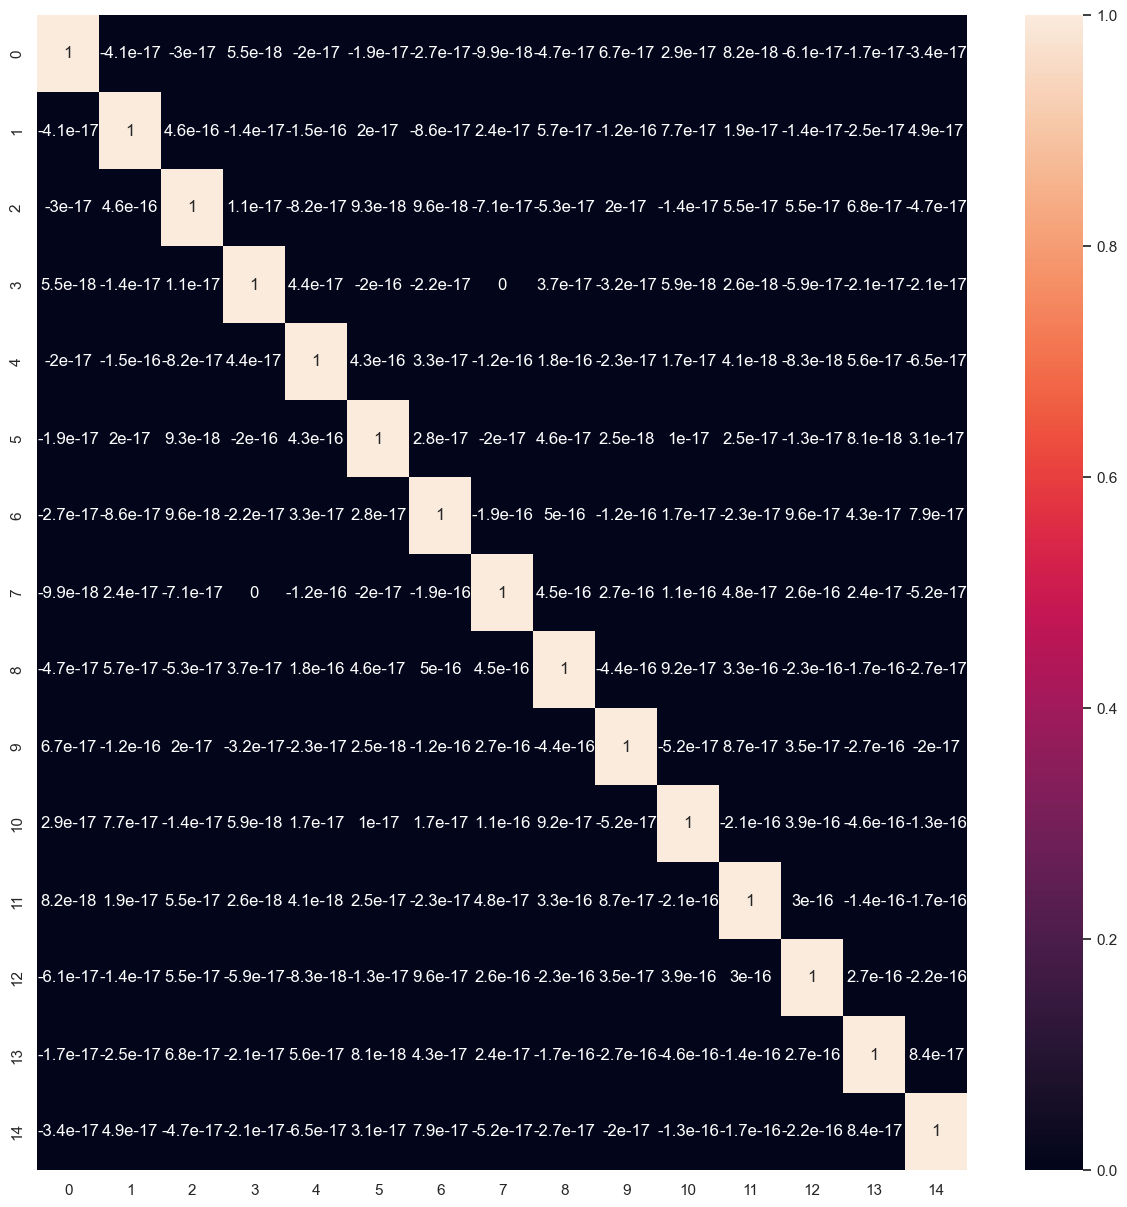

In [58]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_pearson,annot=True)

In [60]:
corr_sp=x_pca_df.corr(method='spearman')

<AxesSubplot:>

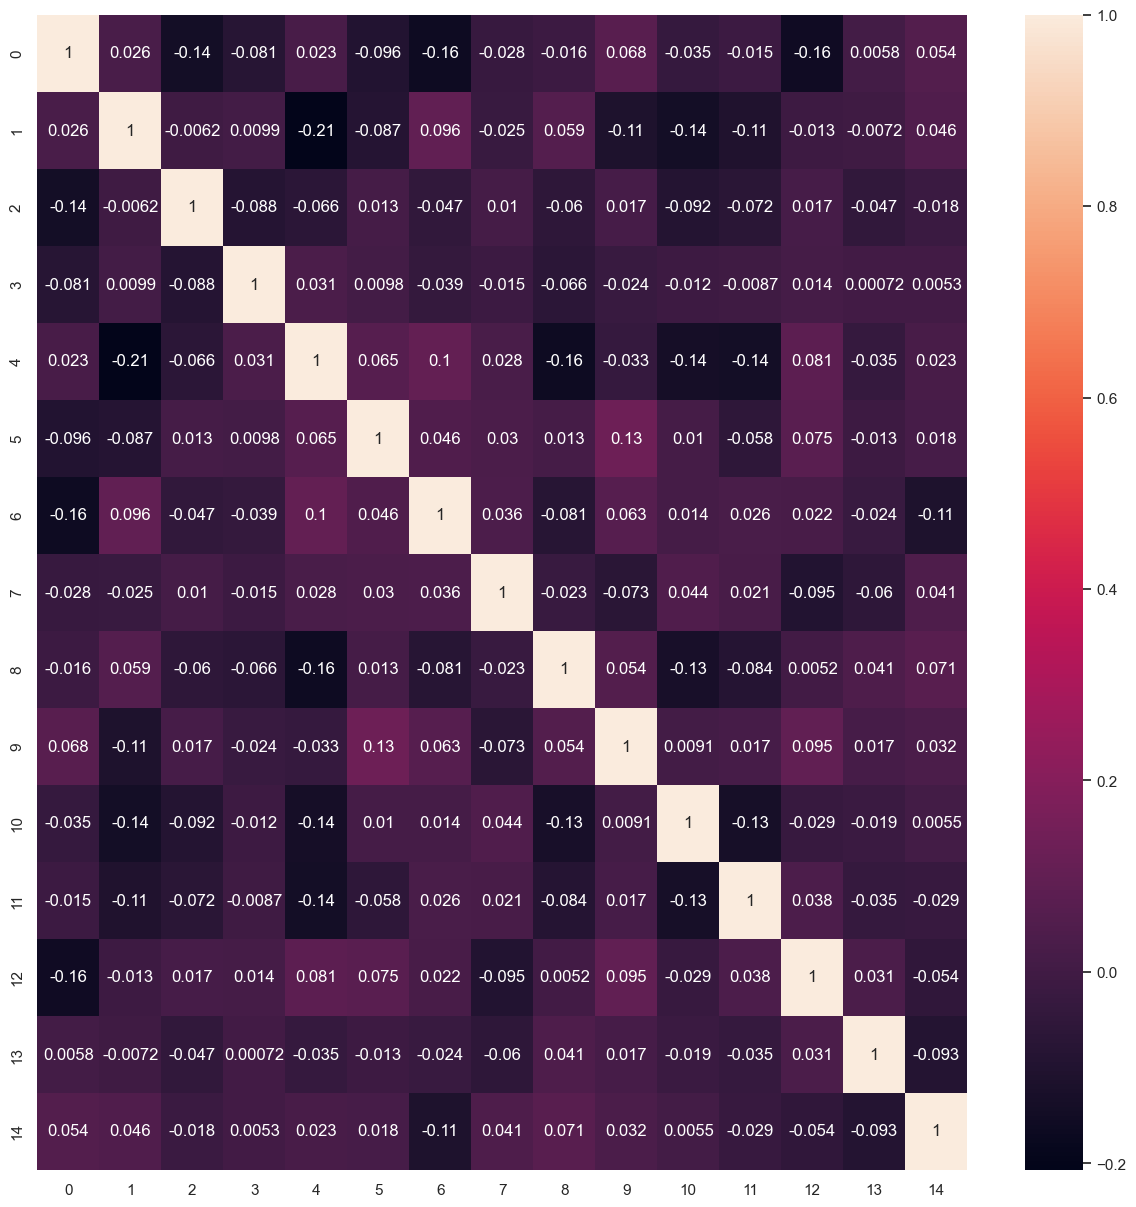

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_sp,annot=True)